# Data Mining -  Final Project
Mohammad Saadati - 
_810198410_

## Introduction
In this project, we intend to turn the problem of estimating the damage caused to buildings by earthquakes based on their characteristics into a classification problem. Among the factors that can affect the amount of damage to a building in an earthquake can be the geographical area where the building is located, the number of floors of the building, the materials used in the building, the purpose of construction, the number of people And the families living in the building and the status of legal ownership of the land. In this project, we encounter problems that may arise during the classification process (such as the large number of features, the Label Imbalance problem, etc.) and take action to solve them.

## Import Libraries
First of all, we import necessary libraries to use their functions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Phase 1: Preprocessing
Pre-processing is one of the most important steps in data mining projects. Various approaches are used in the field of lost data management and data conversion to other formats, and the careful selection of these approaches has a direct impact on the quality of the final results; Therefore, the best approach should always be identified and applied.

First we load csv file as a DataFrame using pandas library.

In [ ]:
values_df = pd.read_csv('drive/My Drive/UT/Term6/DM/Final Project/values.csv')
values_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels_df = pd.read_csv('drive/My Drive/UT/Term6/DM/Final Project/labels.csv')
labels_df

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


First of all, we merge the two dataframe into one dataset.

In [ ]:
dataset_df = pd.merge(values_df,labels_df)
dataset_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


The `describe()` function returns descriptive statistics for every column of DataFrame.

In [ ]:
dataset_df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


The `info()` function returns a summary of DataFrame including data type and non-null values count of each column and also memory usage.

In [ ]:
dataset_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Question 1:
There are different ways for handling categirical data.
* <b>Label Encoders:</b> Assigining numbers to each categorical value. 
* <b>One Hot Encoding:</b>  The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. There are also other ways but here we choose to apply one Hot-Encode to categorical variables.
* <b>Ordinal Encoding:</b> We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

Label Encoders aren't a good option when we have no particular ordering in our categories. In these cases, we can use One Hot Encoding which takes a lot of memory since it is adding a new column for each new category.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None  # default='warn'
numerical_cols = list(dataset_df._get_numeric_data().columns)
categorical_cols = [x for x in list(dataset_df.columns) if x not in numerical_cols]

# ord_enc = OrdinalEncoder()
# dataset_df[categorical_cols] = ord_enc.fit_transform(dataset_df[categorical_cols].astype(str))
# dataset_df

for col in categorical_cols:
    brand_one_hot = pd.get_dummies(dataset_df[col], prefix=col)
    dataset_df = dataset_df.drop([col], axis = 1)
    dataset_df = pd.concat([dataset_df, brand_one_hot], axis = 1)
dataset_df

# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# onehot = encoder.fit_transform(dataset_df[categorical_cols]).toarray()
# encoder_cols = encoder.get_feature_names(categorical_cols)
# categorical_df = pd.DataFrame(onehot,columns = encoder_cols)
# categorical_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,1,...,0,0,0,1,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,0,0,...,0,0,0,0,0,0,0,0,1,0


### Question 2:
In this part, we plot the distribution of features.

Histograms are the simplest way to show how data is spread.

In [ ]:
counter = 0
colors = ['#98f5ff', '#1cc32f', '#FF4040', '#9a34b5', '#1691a7', '#b5347e', '#e5d700', '#de6722', '#8B4513', '#C1FFC1'
          , '#ae8b0c', '#ff796c']
id_columns = ["building_id", "geo_level_1_id","geo_level_2_id","geo_level_3_id"]

# for column in dataset_df:
#     if column not in bad_column:
#         dataset_df[column].value_counts().plot.bar(color = colors[counter % 12])
#         plt.xlabel("Value") 
#         plt.ylabel("Count") 
#         plt.title("Distribution of " + column) 
#         plt.show()
#         counter += 1

If you want to combine histograms and KDE plot, Seaborn has another cool way to show both histograms and KDE plots in one graph: Distribution plot which draws KDE Plot with the flexibility of turning on and off the histograms by changing the hist parameter in the function.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


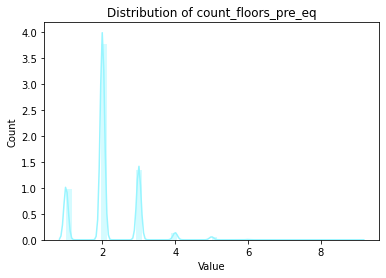

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


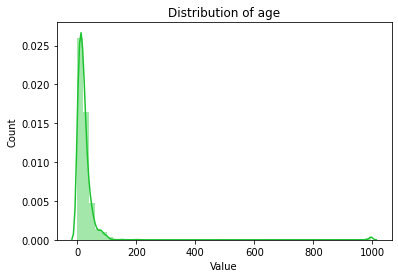

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


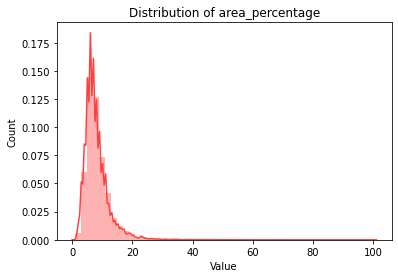

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


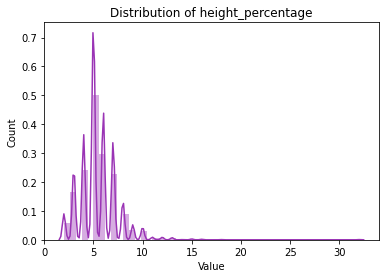

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


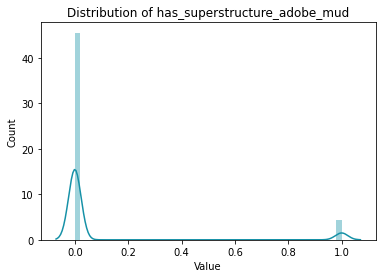

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


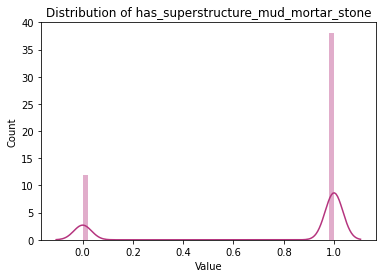

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


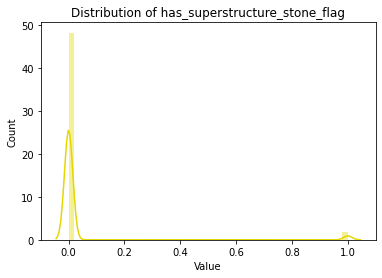

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


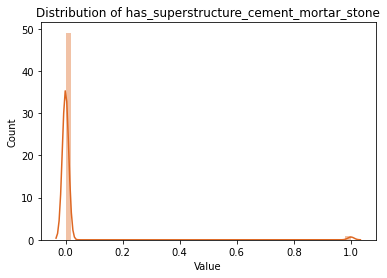

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


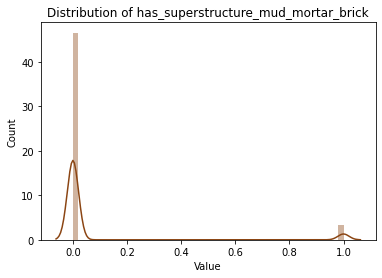

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


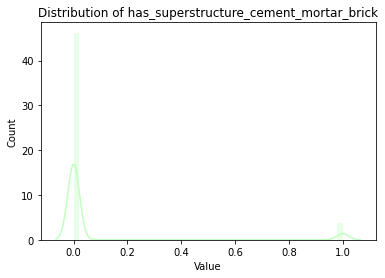

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


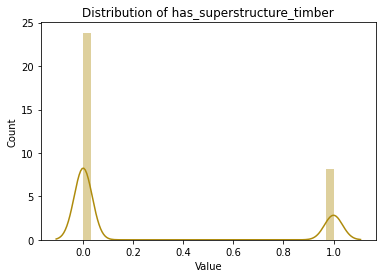

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


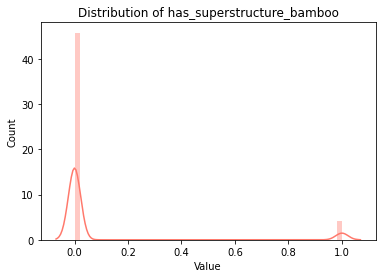

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


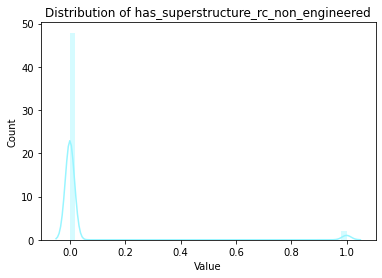

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


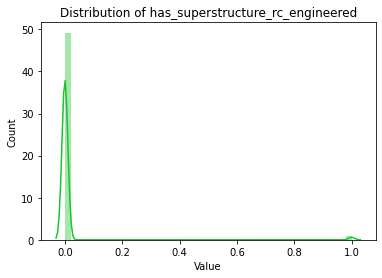

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


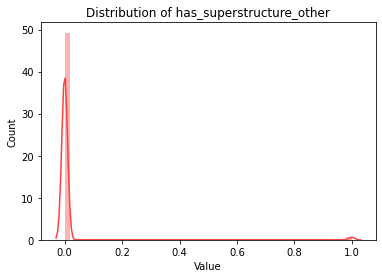

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


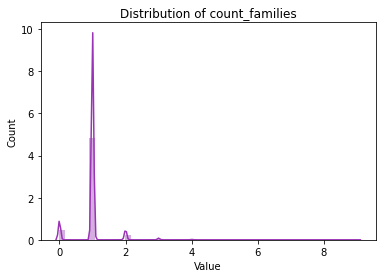

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


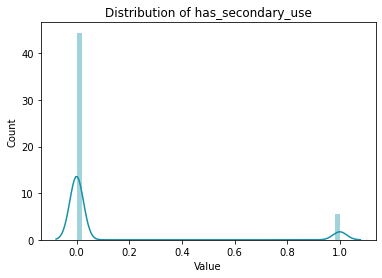

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


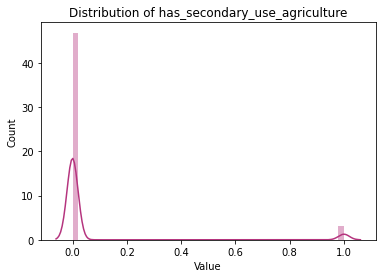

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


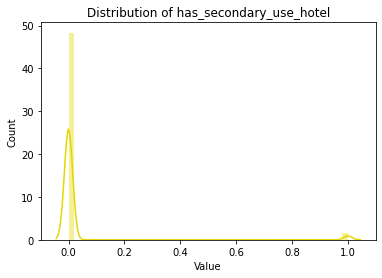

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


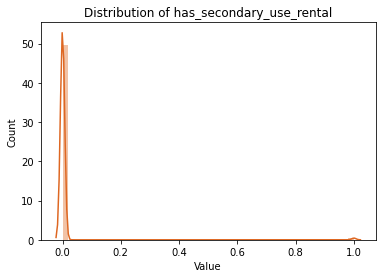

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


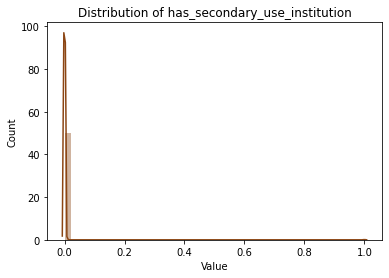

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


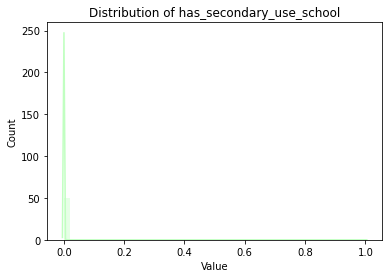

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


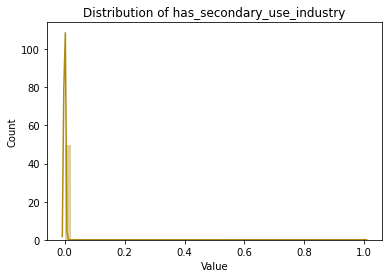

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


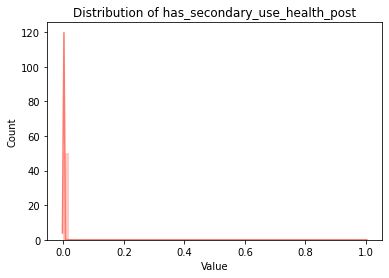

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


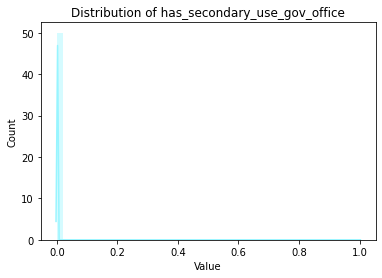

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


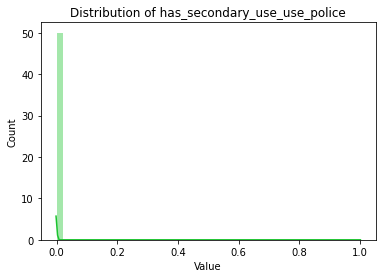

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


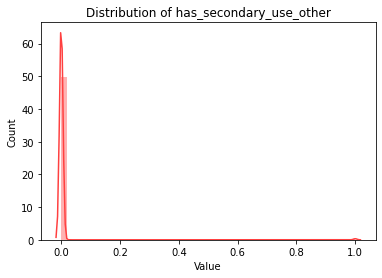

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


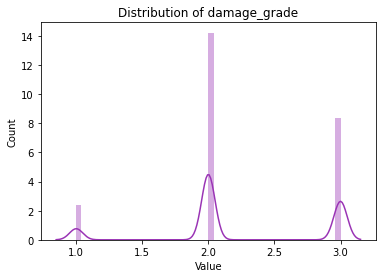

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


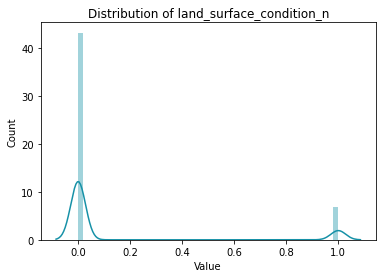

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


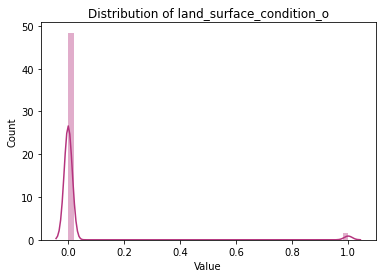

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


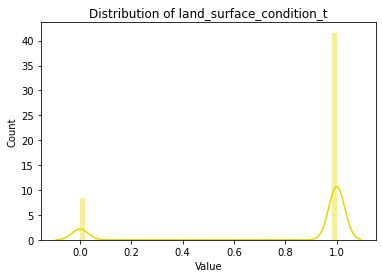

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


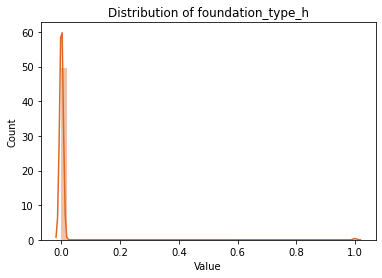

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


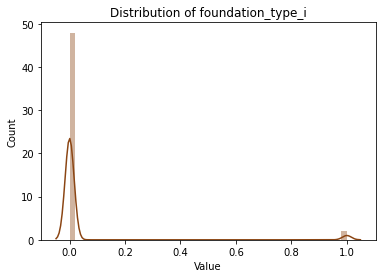

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


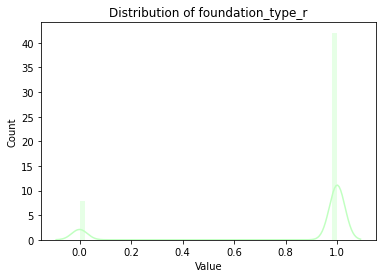

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


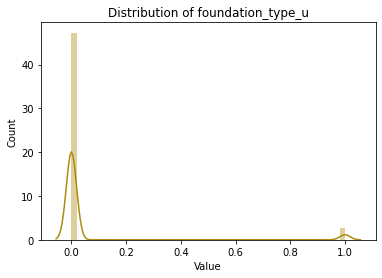

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


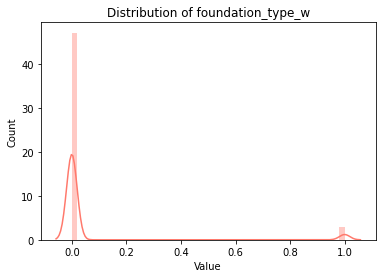

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


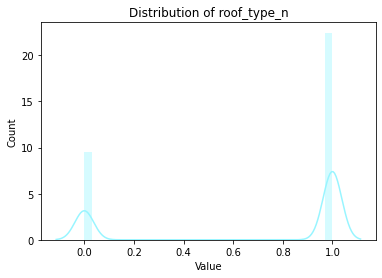

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


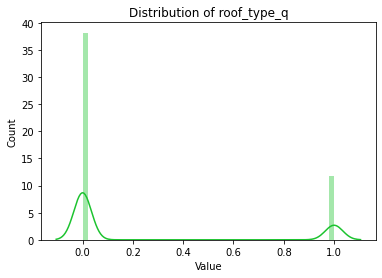

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


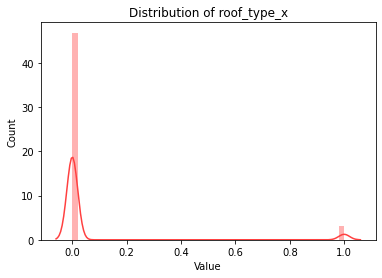

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


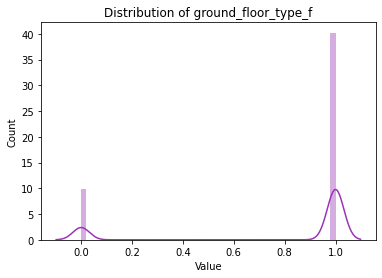

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


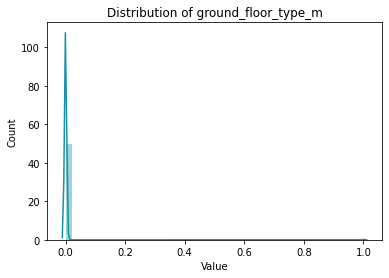

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


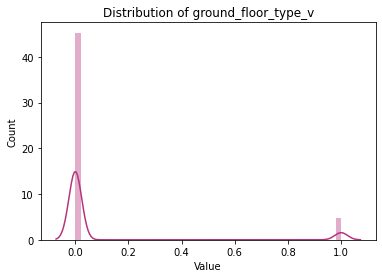

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


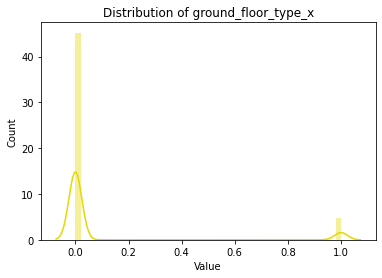

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


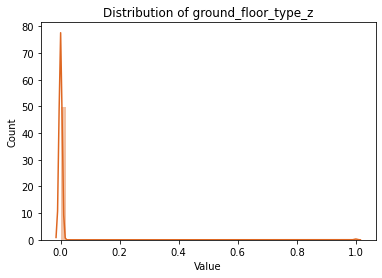

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


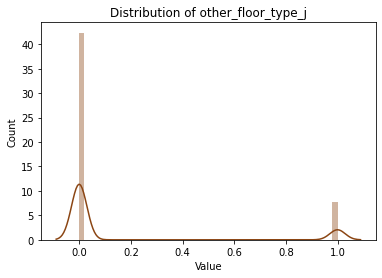

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


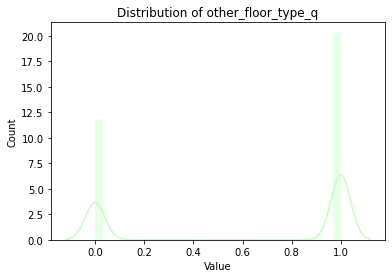

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


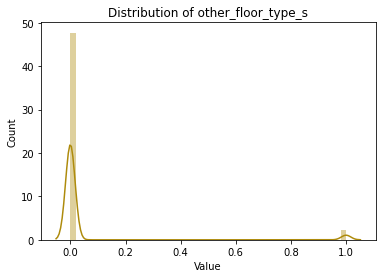

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


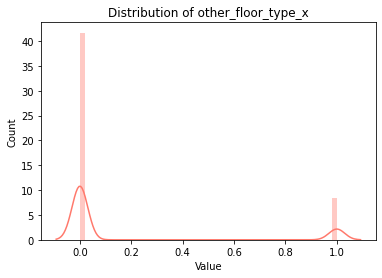

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


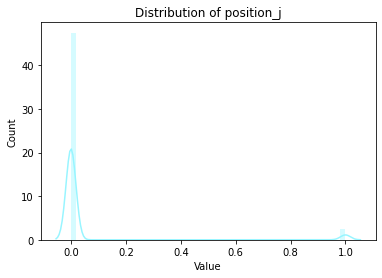

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


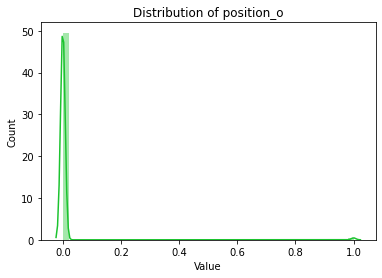

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


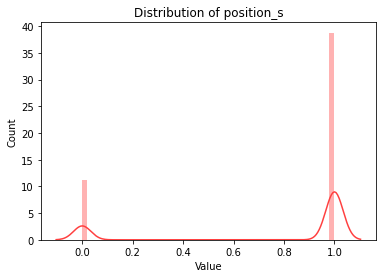

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


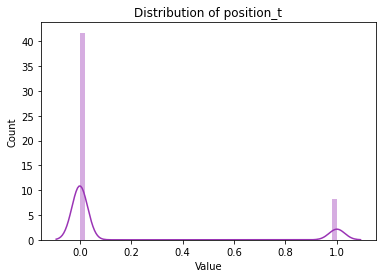

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


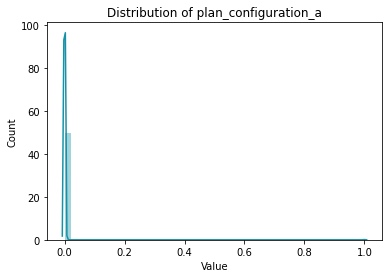

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


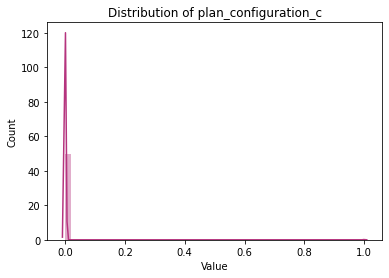

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


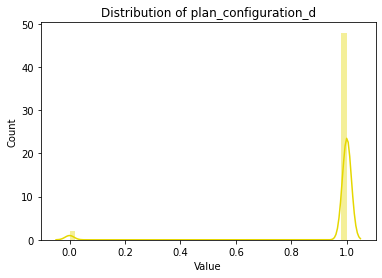

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


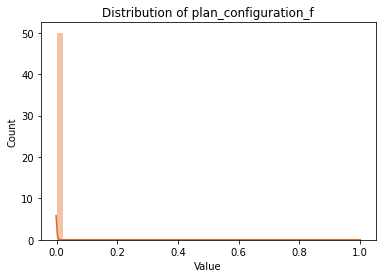

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


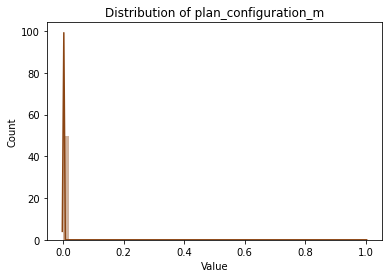

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


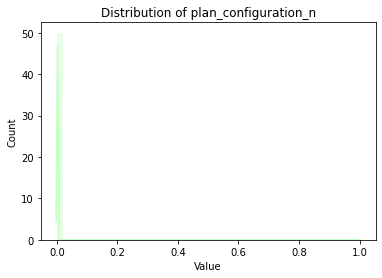

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


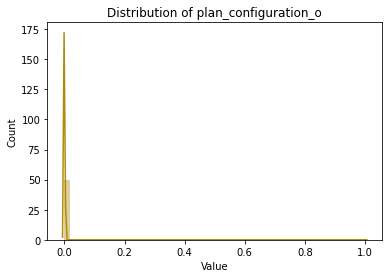

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


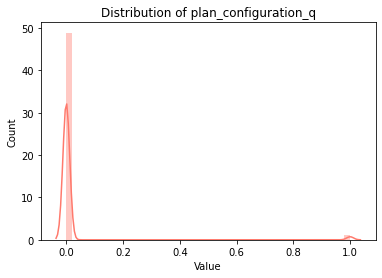

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


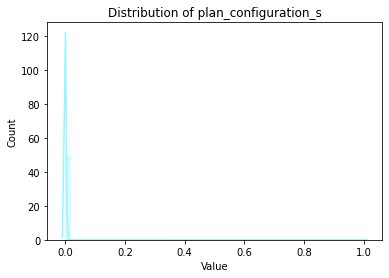

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


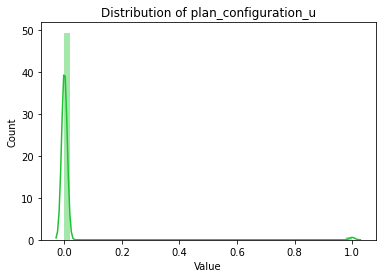

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


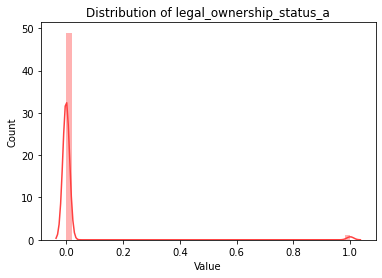

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


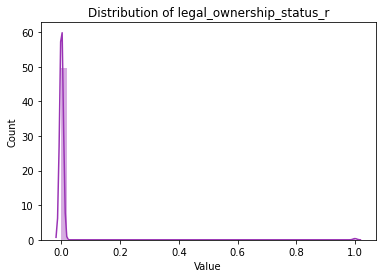

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


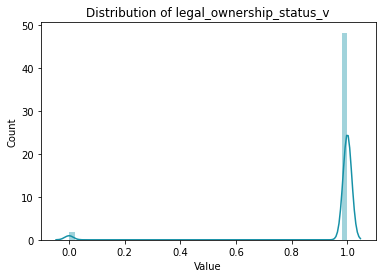

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


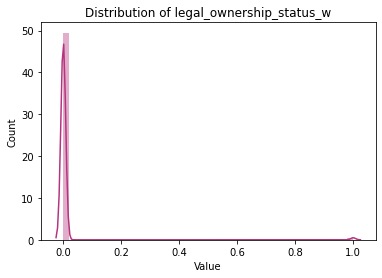

In [ ]:
for column in dataset_df:
    if column not in id_columns:
        ax = sns.distplot(dataset_df[column], hist=True, color= colors[counter % 12])
        plt.xlabel("Value") 
        plt.ylabel("Count") 
        plt.title("Distribution of " + column) 
        plt.show() 
        counter += 1

Numerical features follow the binomial distribution. A **binomial distribution** can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has **two possible outcomes** (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail.

* <b>Normalizing Data:</b> Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.  Normalization change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Normalization is required only when features have different ranges.
* <b>Standardizing Data:</b> Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). When we compare measurements that have different units Standardizing the features is important. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

Since numerical features follow a binomial distribution, we use Normalization to put all the features in the same range.

In [ ]:
norm_column = list(dataset_df._get_numeric_data().columns)

# for column in norm_column:
#     ax = dataset_df[column].plot.kde()

In [ ]:
for col in dataset_df:
    if col != "damage_grade":
        dataset_df[col] = (dataset_df[col]-dataset_df[col].min())/(dataset_df[col].max()-dataset_df[col].min()) # dataset_df[col].std()

dataset_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0.762541,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.027377,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.090170,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.561175,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.191789,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.654015,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
260597,0.635827,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260598,0.572220,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260599,0.143794,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# for column in norm_column:
#     ax = dataset_df[column].plot.kde()

### Question 3:
mutual_info_regression is used and the feature values and the target of dataset(type) passed to it.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

features = ["damage_grade"] 
y = dataset_df['damage_grade']
X = dataset_df.copy()
X = X.drop(columns=features, axis = 1)
mir = mutual_info_regression(X, y)
mir = pd.Series(mir)
mir.index = X.columns
mir

building_id                 0.000979
geo_level_1_id              0.131590
geo_level_2_id              0.235890
geo_level_3_id              0.297459
count_floors_pre_eq         0.018776
                              ...   
plan_configuration_u        0.002420
legal_ownership_status_a    0.005683
legal_ownership_status_r    0.000381
legal_ownership_status_v    0.004400
legal_ownership_status_w    0.000103
Length: 69, dtype: float64

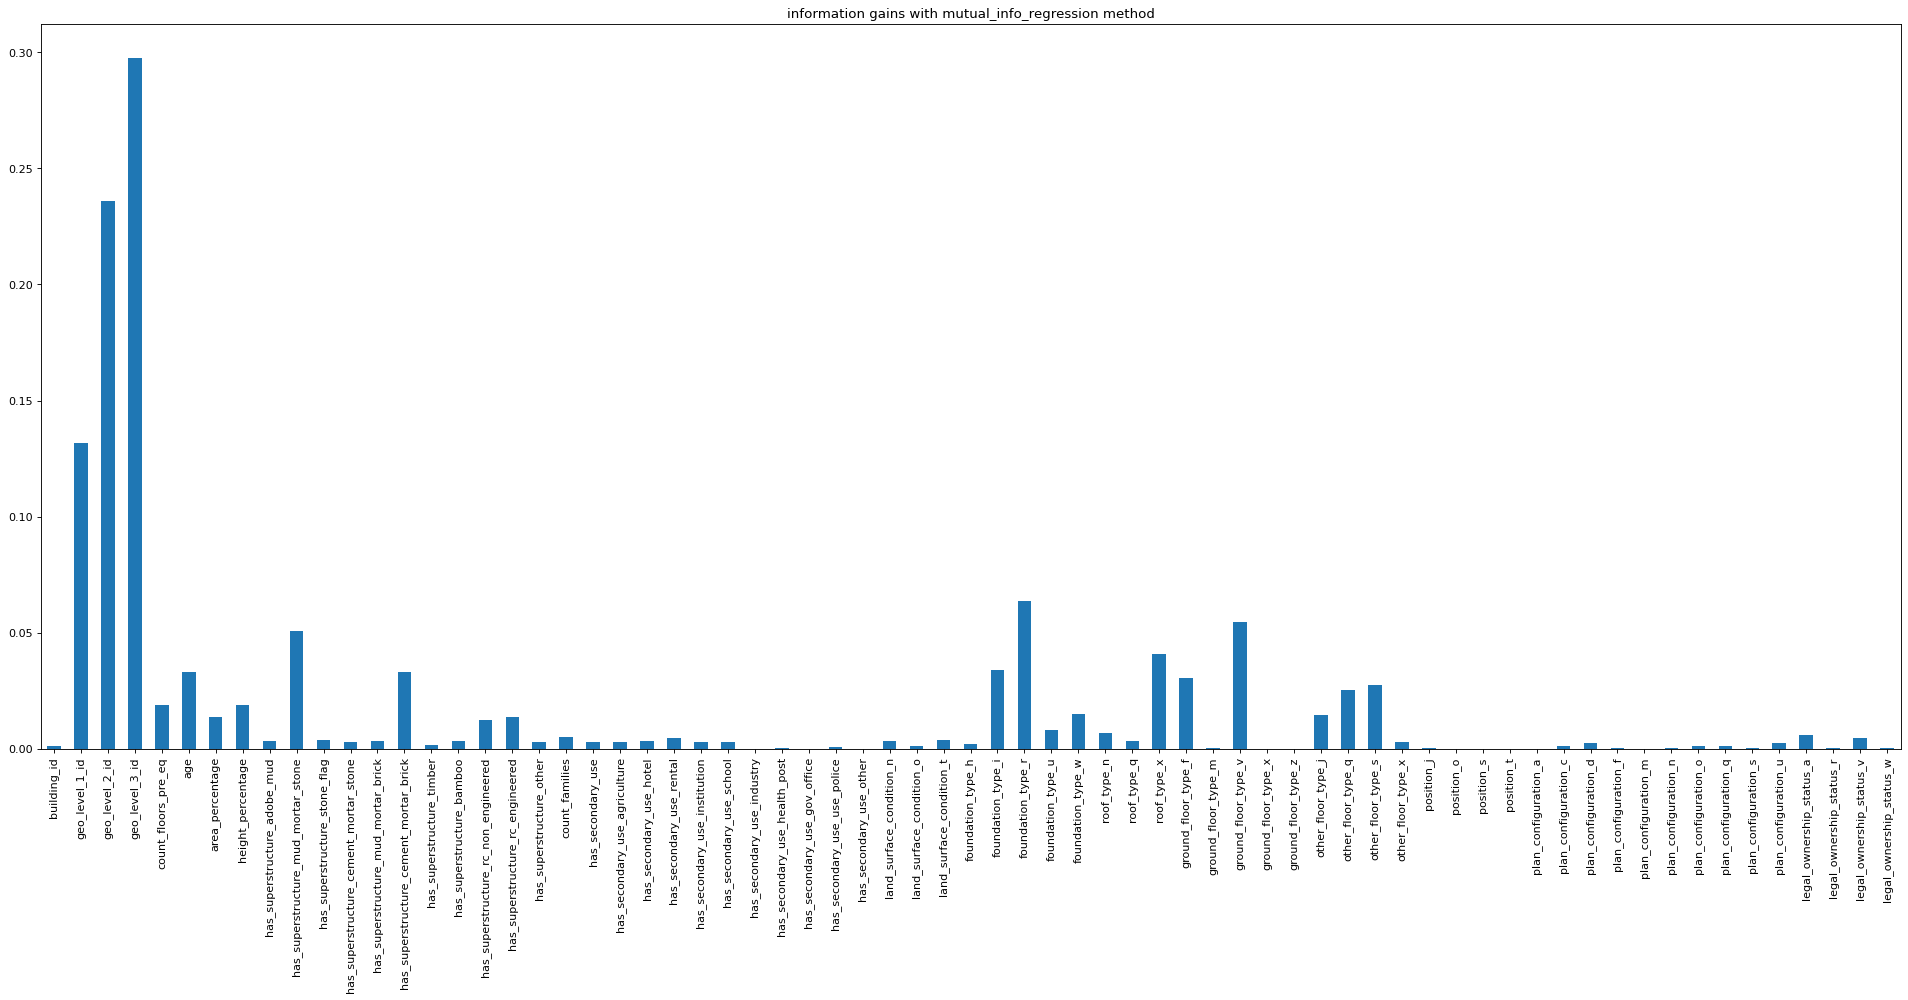

In [ ]:
plt.figure(figsize=(30,12), dpi= 80, facecolor='w', edgecolor='k')
mir.plot.bar()
plt.title('information gains with mutual_info_regression method')
plt.show()

if information gain (the values in the bar chart below) is high it means that the corresponding feature can provide more information than the others meaning that it'll help the training procedure more so it's a good idea to keep that feature in the dataset and use it's values in the training. This plot shows that the columns genres are giving us more useful info about the type of each row. We can simply eliminate the other columns since they don't have much gain.

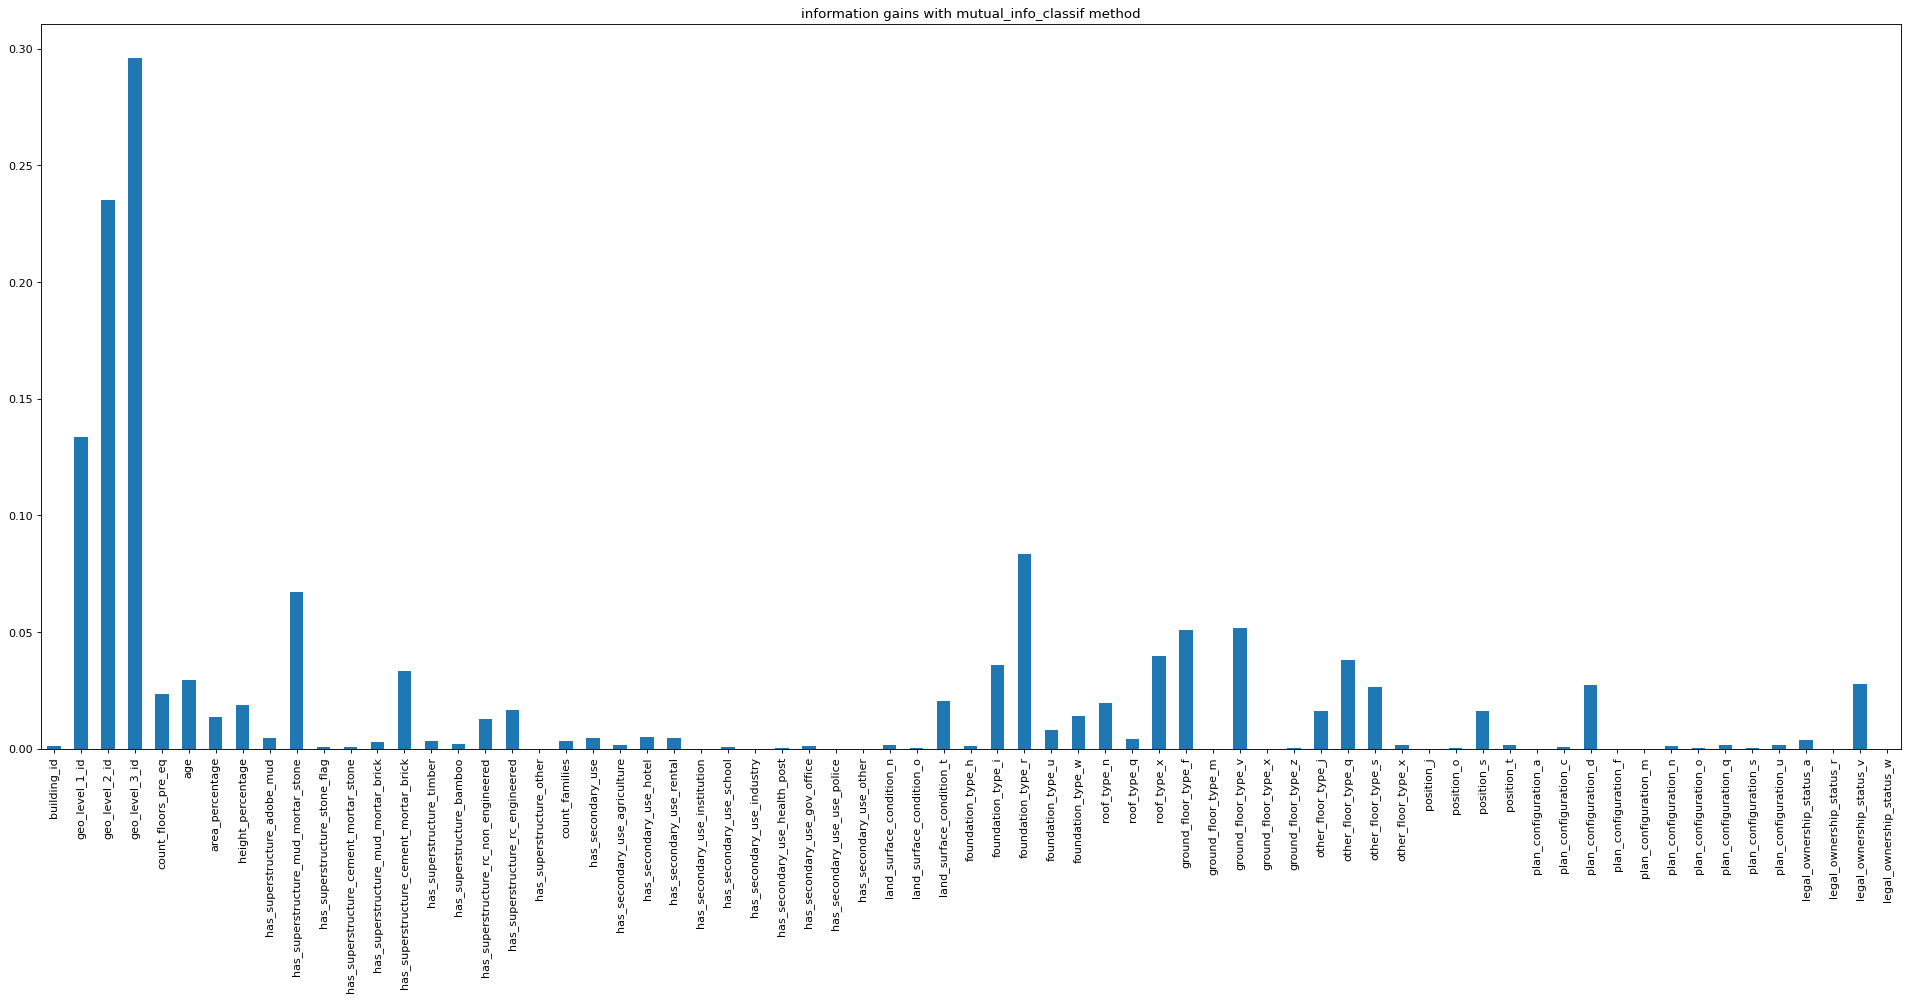

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# information_gains = dict(zip(dataset_df.drop(columns=features).columns, mutual_info_classif(dataset_df.drop(columns=features), dataset_df["damage_grade"])))
# lists = sorted(information_gains.items())
# x_, y_ = zip(*lists)
# fig=plt.figure(figsize=(32,12), dpi= 80, facecolor='w', edgecolor='k')
# plt.plot(x_, y_)
# plt.title('information gains with mutual_info_classif method')
# plt.xticks(x_, information_gains.keys(), rotation='vertical')
# plt.show()

mic = mutual_info_classif(X, y)
mic = pd.Series(mic)
mic.index = X.columns
plt.figure(figsize=(30,12), dpi= 80, facecolor='w', edgecolor='k')
mic.plot.bar()
plt.title('information gains with mutual_info_classif method')
plt.show()

Mutual information is a quantity that measures how much one random variables tells about another. Mutual information can be thought of as the reduction in uncertainty about one random variable given knowledge of another. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent. For calculating the information gain of features in this project the mutual_info_classif function from sklearn.feature_selection was used. The function returns an estimate for mutual information for a discrete target variable Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Feature selection is meant to choose the most effective features from data.
As we mentioned earlier we can use the the correlation between features and target to determine the most numerical features.
For the categorical features we can use the chi-square approach to check independent features from target and remove them.
Dimensionality reduction may create new features from current features to get more accuraccy.

An alternative approach could be to remove categorical variables from the dataset. While removing features is always an option, it may not be the best way to deal with categorical variables as we will lose potentially important information.

In [ ]:
dataset_df.corr()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,...,-0.002395,0.001045,-0.000097,-0.000037,0.002985,0.001353,-0.000714,-0.002099,0.002637,-0.002361
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,...,0.004048,0.000822,0.008179,0.009383,0.008559,0.033052,0.100393,0.007874,-0.082055,0.004646
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,...,-0.007971,0.000415,-0.005786,-0.004326,-0.005928,-0.025532,-0.025893,-0.027011,0.023189,0.013579
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,...,-0.005090,0.003123,-0.002804,0.001895,-0.003399,0.003240,0.034199,-0.001309,-0.018533,-0.013100
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,...,0.015891,0.002651,0.001148,-0.033170,-0.003314,-0.004863,-0.096866,-0.008236,0.073273,0.007046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
plan_configuration_u,0.001353,0.033052,-0.025532,0.003240,-0.004863,-0.003630,0.096170,0.006197,0.019020,-0.098556,...,-0.001583,-0.001439,-0.002944,-0.017807,-0.004345,1.000000,0.018570,0.005391,-0.016370,0.000167
legal_ownership_status_a,-0.000714,0.100393,-0.025893,0.034199,-0.096866,-0.023928,-0.028249,-0.078852,-0.030176,-0.138746,...,-0.001953,0.002642,0.007168,0.011788,0.002696,0.018570,1.000000,-0.011083,-0.749134,-0.014976
legal_ownership_status_r,-0.002099,0.007874,-0.027011,-0.001309,-0.008236,-0.001055,-0.015343,-0.008693,0.025108,-0.047872,...,-0.001002,0.003329,0.000210,-0.003562,0.005685,0.005391,-0.011083,1.000000,-0.384233,-0.007681
legal_ownership_status_v,0.002637,-0.082055,0.023189,-0.018533,0.073273,0.016697,0.029261,0.063050,-0.004681,0.126641,...,0.002607,-0.002676,-0.005021,-0.007498,-0.004000,-0.016370,-0.749134,-0.384233,1.000000,-0.519193


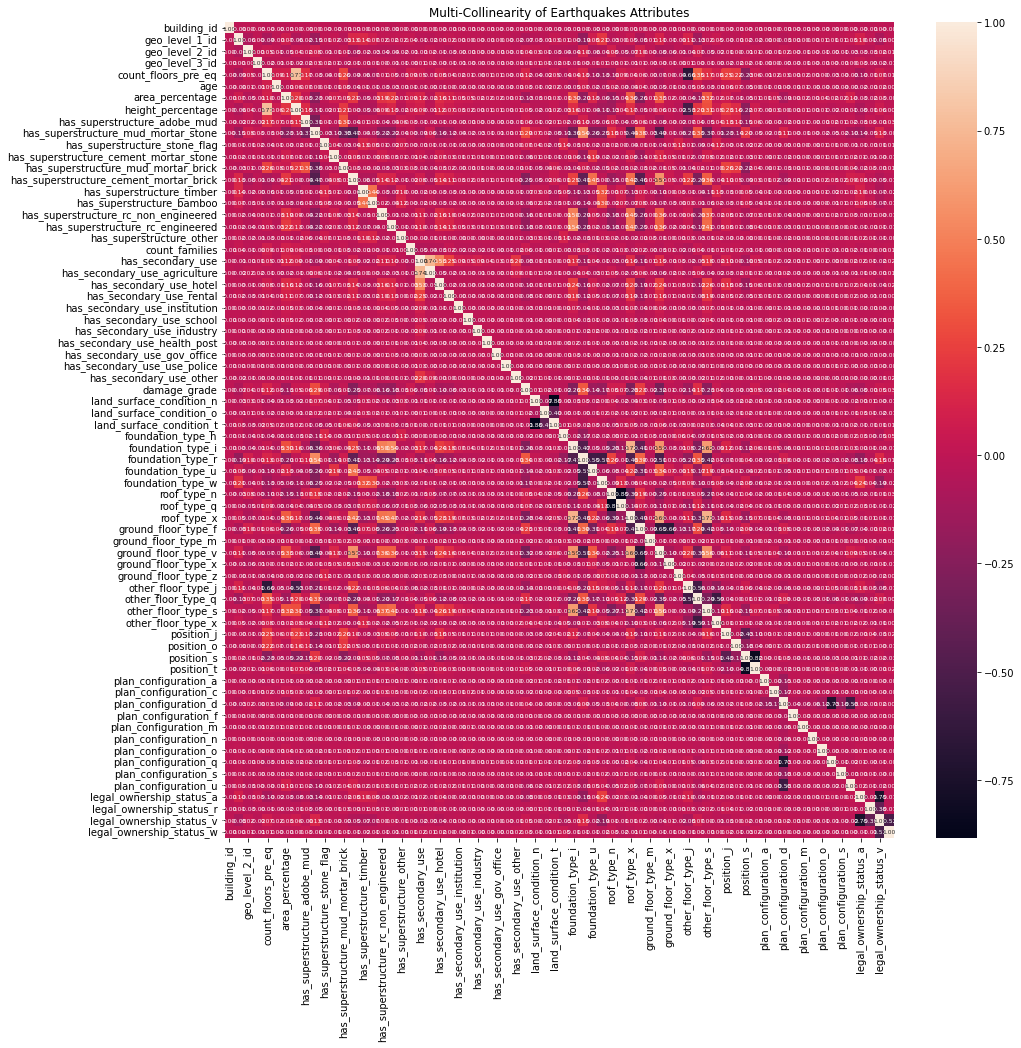

In [ ]:
corr = dataset_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize":6})
plt.title("Multi-Collinearity of Earthquakes Attributes")
plt.show()

We select the 30 columns that have the most gain with the target column and drop the rest of the columns.

In [ ]:
most_gain_mir = mic.nlargest(25).index.tolist()
most_gain_mir

['geo_level_3_id',
 'geo_level_2_id',
 'geo_level_1_id',
 'foundation_type_r',
 'has_superstructure_mud_mortar_stone',
 'ground_floor_type_v',
 'ground_floor_type_f',
 'roof_type_x',
 'other_floor_type_q',
 'foundation_type_i',
 'has_superstructure_cement_mortar_brick',
 'age',
 'legal_ownership_status_v',
 'plan_configuration_d',
 'other_floor_type_s',
 'count_floors_pre_eq',
 'land_surface_condition_t',
 'roof_type_n',
 'height_percentage',
 'has_superstructure_rc_engineered',
 'other_floor_type_j',
 'position_s',
 'foundation_type_w',
 'area_percentage',
 'has_superstructure_rc_non_engineered']

In [ ]:
preprocessed_dataset_df = dataset_df[most_gain_mir]
preprocessed_dataset_df['damage_grade'] = dataset_df['damage_grade']
preprocessed_dataset_df

,geo_level_3_id,geo_level_2_id,geo_level_1_id,foundation_type_r,has_superstructure_mud_mortar_stone,ground_floor_type_v,ground_floor_type_f,roof_type_x,other_floor_type_q,foundation_type_i,...,land_surface_condition_t,roof_type_n,height_percentage,has_superstructure_rc_engineered,other_floor_type_j,position_s,foundation_type_w,area_percentage,has_superstructure_rc_non_engineered,damage_grade
0,0.970637,0.341275,0.200000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.100000,0.0,0.0,0.0,0.0,0.050505,0.0,3
1,0.223761,0.630694,0.266667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.166667,0.0,0.0,1.0,0.0,0.070707,0.0,2
2,0.714013,0.254380,0.700000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.100000,0.0,0.0,0.0,0.0,0.040404,0.0,3
3,0.850959,0.292922,0.733333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.100000,0.0,0.0,1.0,0.0,0.050505,0.0,2
4,0.118405,0.091801,0.366667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.233333,0.0,0.0,1.0,0.0,0.070707,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.128989,0.935529,0.833333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.033333,0.0,1.0,1.0,0.0,0.050505,0.0,2
260597,0.163921,0.501051,0.566667,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.100000,0.0,0.0,1.0,0.0,0.050505,0.0,3
260598,0.649558,0.035739,0.566667,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.166667,0.0,0.0,1.0,0.0,0.050505,0.0,3
260599,0.147291,0.027330,0.866667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.133333,0.0,0.0,0.0,0.0,0.131313,0.0,2


## Phase 2: Learn and choose the right model

Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,
because there may be overfitting on train data.
So we can split our data to train/test to handle this challenge, but again there is another problem.
First of all we have to divide our dataset to two parts trainset and testset so by using `train_test_split` method of `sklearn` and setting `test_size` we'll determine what percentage of our data is for test. For the division `train_test_split` fucntions from `sklearn.model_selection` is used which returns 4 dataset likes. Two are for the training data and two are for test data. And the dependent variable which here is the `type` feature.

The `P` ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.
Assume that we have extremely small data in this situations small p may effect our learning accuracy.
In larger datasets we can do the split with more confidence.

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.
`random_state` is for getting the same set of data each time so that we don't get different results, meaning it won't give us random data each time. `random_state` is like the seed that we set for random. 

The `stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter `stratify`. For example, if variable `y` is a binary categorical variable with values `0` and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of `0`'s and 75% of `1`'s.

Because the amount of data is too large compared to the resources available to us, we use a sample of `100000` pieces of data.

In [ ]:
preprocessed_dataset_df = preprocessed_dataset_df.sample(50000) # Should be 100,000

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Y = preprocessed_dataset_df['damage_grade']
X = preprocessed_dataset_df.drop(columns=['damage_grade'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.20 , random_state = 42, stratify=Y)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train , Y_train , test_size = 0.25 , random_state = 42, stratify=Y_train)

### Support vector machines (SVMs)
**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (`numpy.ndarray` and convertible to that by `numpy.asarray`) and sparse (any `scipy.sparse`) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. 

**Parameters**:
* **C:** Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
* **kernel:** Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape `(n_samples, n_samples)`.
* **degree:** Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
* **gamma:** Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
* **coef0:** Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

Parameter **C** should be equal to `1` because if it is less than one, underfitting and if it is greater than one, overfitting occurs in the model.

#### kernel = Linear :
For this kernel, we change the value of `D` parameter from $5 *10^{-3}$ to $10$ to find the best value to build the model.

Best C index: 0.05
Best possible accuracy: 57.43000000000001


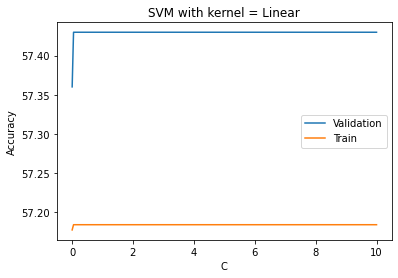

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

train_accuracy = []
validation_accuracy = []
max_accuracy = 0
best_c = 0
c_values = [0.005, 0.05, 0.5, 1, 5, 10]

for i in c_values:
    clf = SVC(kernel = "linear", C = i)
    clf.fit(X_train, Y_train)
    validation_predict = clf.predict(X_validation)
    train_predict = clf.predict(X_train)
    train_accuracy.append(metrics.accuracy_score(Y_train, train_predict)* 100)
    validation_accuracy.append(metrics.accuracy_score(Y_validation, validation_predict)* 100)
    if (metrics.accuracy_score(Y_validation, validation_predict)* 100) > max_accuracy:
        max_accuracy = metrics.accuracy_score(Y_validation, validation_predict) * 100
        best_c = i

print("Best C index:", best_c)
print("Best possible accuracy: " + str(max_accuracy))
plt.plot([0.005, 0.05, 0.5, 1, 5, 10], validation_accuracy, label='Validation')
plt.plot([0.005, 0.05, 0.5, 1, 5, 10], train_accuracy, label='Train')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title('SVM with kernel = Linear')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print("best C =", best_c)
clf = SVC(kernel = "linear", C = best_c)
clf.fit(X_train, Y_train)
validation_predict = clf.predict(X_validation)
train_predict = clf.predict(X_train)
print("\nvalidation accuracy:", accuracy_score(np.round(abs(Y_validation)), np.round(abs(validation_predict))) * 100, "%")
print("classification report : \n", classification_report(np.round(abs(Y_validation)), np.round(abs(validation_predict))))
print("\ntrain accuracy:", accuracy_score(np.round(abs(Y_train)), np.round(abs(train_predict))) * 100, "%")
print("classification report : \n", classification_report(np.round(abs(Y_train)), np.round(abs(train_predict))))

best C = 0.05

validation accuracy: 57.43000000000001 %
classification report : 
               precision    recall  f1-score   support

           1       0.73      0.11      0.20       964
           2       0.57      0.99      0.73      5672
           3       0.00      0.00      0.00      3364

    accuracy                           0.57     10000
   macro avg       0.43      0.37      0.31     10000
weighted avg       0.39      0.57      0.43     10000


train accuracy: 57.18333333333333 %
classification report : 
               precision    recall  f1-score   support

           1       0.62      0.11      0.18      2892
           2       0.57      0.99      0.72     17015
           3       0.00      0.00      0.00     10093

    accuracy                           0.57     30000
   macro avg       0.40      0.37      0.30     30000
weighted avg       0.38      0.57      0.43     30000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

#### kernel = Polynomial :
For this kernel, we change the value of `degree` parameter from 2 to 8 to find the best value to build the model.

Best degree index: 10
Best possible accuracy: 60.529999999999994


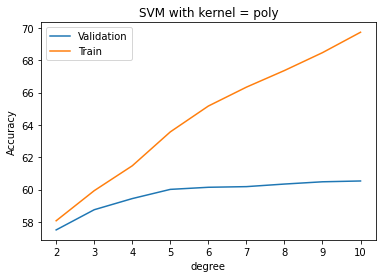

In [ ]:
train_accuracy = []
validation_accuracy = []
max_accuracy = 0
best_degree = 0

for i in range (2,11):
    clf = SVC(kernel = "poly", degree = i)
    clf.fit(X_train, Y_train)
    validation_predict = clf.predict(X_validation)
    train_predict = clf.predict(X_train)
    train_accuracy.append(metrics.accuracy_score(Y_train, train_predict)* 100)
    validation_accuracy.append(metrics.accuracy_score(Y_validation, validation_predict)* 100)
    if (metrics.accuracy_score(Y_validation, validation_predict)* 100) > max_accuracy:
        max_accuracy = metrics.accuracy_score(Y_validation, validation_predict) * 100
        best_degree = i

print("Best degree index:", best_degree)
print("Best possible accuracy: " + str(max_accuracy))
plt.plot(list(range(2, 11)),validation_accuracy, label='Validation')
plt.plot(list(range(2, 11)), train_accuracy, label='Train')
plt.ylabel('Accuracy')
plt.xlabel('degree')
plt.title('SVM with kernel = poly')
plt.legend()
plt.show()

In [ ]:
print("best degree =", best_degree)
clf = SVC(kernel = "poly", degree = best_degree)
clf.fit(X_train, Y_train)
validation_predict = clf.predict(X_validation)
train_predict = clf.predict(X_train)
print("\nvalidation accuracy:", accuracy_score(np.round(abs(Y_validation)), np.round(abs(validation_predict))) * 100, "%")
print("classification report : \n", classification_report(np.round(abs(Y_validation)), np.round(abs(validation_predict))))
print("\ntrain accuracy:", accuracy_score(np.round(abs(Y_train)), np.round(abs(train_predict))) * 100, "%")
print("classification report : \n", classification_report(np.round(abs(Y_train)), np.round(abs(train_predict))))

best degree = 10

validation accuracy: 60.529999999999994 %
classification report : 
               precision    recall  f1-score   support

           1       0.51      0.34      0.41       979
           2       0.63      0.82      0.71      5681
           3       0.56      0.32      0.41      3340

    accuracy                           0.61     10000
   macro avg       0.57      0.49      0.51     10000
weighted avg       0.59      0.61      0.58     10000


train accuracy: 69.74000000000001 %
classification report : 
               precision    recall  f1-score   support

           1       0.86      0.57      0.68      2937
           2       0.68      0.89      0.77     17042
           3       0.69      0.41      0.52     10021

    accuracy                           0.70     30000
   macro avg       0.75      0.62      0.66     30000
weighted avg       0.70      0.70      0.68     30000



#### kernel = Gaussian :
For this kernel, we change the value of `gamma` parameter from $10^{-2}$ to $10$ to find the best value to build the model.

Best gamma index: 40
Best possible accuracy: 63.43


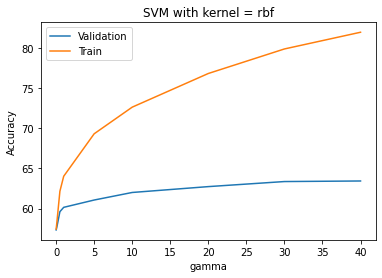

In [ ]:
train_accuracy = []
validation_accuracy = []
max_accuracy = 0
best_gamma = 0
gamma_values = [0.01, 0.1, 0.5, 1, 5, 10, 20, 30, 40]

for i in gamma_values:
    clf = SVC(kernel = "rbf", gamma = i)
    clf.fit(X_train, Y_train)
    validation_predict = clf.predict(X_validation)
    train_predict = clf.predict(X_train)
    train_accuracy.append(metrics.accuracy_score(Y_train, train_predict)* 100)
    validation_accuracy.append(metrics.accuracy_score(Y_validation, validation_predict)* 100)
    if (metrics.accuracy_score(Y_validation, validation_predict)* 100) > max_accuracy:
        max_accuracy = metrics.accuracy_score(Y_validation, validation_predict) * 100
        best_gamma = i

print("Best gamma index:", best_gamma)
print("Best possible accuracy: " + str(max_accuracy))
plt.plot([0.01, 0.1, 0.5, 1, 5, 10, 20, 30, 40], validation_accuracy, label='Validation')
plt.plot([0.01, 0.1, 0.5, 1, 5, 10, 20, 30, 40], train_accuracy, label='Train')
plt.ylabel('Accuracy')
plt.xlabel('gamma')
plt.title('SVM with kernel = rbf')
plt.legend()
plt.show()

In [ ]:
print("best gamma =", best_gamma)
clf = SVC(kernel = "rbf", gamma = best_gamma)
clf.fit(X_train, Y_train)
validation_predict = clf.predict(X_validation)
train_predict = clf.predict(X_train)
print("\nvalidation accuracy:", accuracy_score(np.round(abs(Y_validation)), np.round(abs(validation_predict))) * 100, "%")
print("classification report : \n", classification_report(np.round(abs(Y_validation)), np.round(abs(validation_predict))))
print("\ntrain accuracy:", accuracy_score(np.round(abs(Y_train)), np.round(abs(train_predict))) * 100, "%")
print("classification report : \n", classification_report(np.round(abs(Y_train)), np.round(abs(train_predict))))

best gamma = 40

validation accuracy: 63.43 %
classification report : 
               precision    recall  f1-score   support

           1       0.63      0.15      0.24       979
           2       0.63      0.86      0.73      5681
           3       0.64      0.39      0.48      3340

    accuracy                           0.63     10000
   macro avg       0.63      0.47      0.48     10000
weighted avg       0.63      0.63      0.60     10000


train accuracy: 81.94333333333333 %
classification report : 
               precision    recall  f1-score   support

           1       0.96      0.64      0.77      2937
           2       0.79      0.94      0.86     17042
           3       0.86      0.67      0.75     10021

    accuracy                           0.82     30000
   macro avg       0.87      0.75      0.79     30000
weighted avg       0.83      0.82      0.81     30000



### Multi-layer Perceptron

In [ ]:
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim = 20, activation='tanh'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimzier = 'adam', metrics=['accuracy'])

In [ ]:
import transflow as tf
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, to_categorical(Y_train - 1), epochs=500, batch_size=100)

In [ ]:
mlp_report =  classification_report(np.round(abs(Y_validation)), np.round(np.argmax(model.predict(X_validation),axis = 1)+1), output_dict = true )

In [ ]:
mlp_report